In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/gurgaon_properties_cleaned_v2.csv')
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,...,NaN,1000.0,NaN,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,...,NaN,NaN,4800.0,1,1,0,0,0,0,119
2,flat,signature global park,sohna road,0.90,8035.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,...,1120.0,NaN,NaN,0,0,0,0,0,0,144
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,...,NaN,1935.0,NaN,0,0,1,0,0,1,75
4,flat,central park flower valley aqua front towers,sector 33,1.70,9502.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3,...,1789.0,NaN,NaN,0,0,0,0,0,0,24


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3687 entries, 0 to 3813
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3687 non-null   object 
 1   society              3686 non-null   object 
 2   sector               3687 non-null   object 
 3   price                3662 non-null   float64
 4   price_per_sqft       3662 non-null   float64
 5   area                 3662 non-null   float64
 6   areaWithType         3687 non-null   object 
 7   bedRoom              3687 non-null   int64  
 8   bathroom             3687 non-null   int64  
 9   balcony              3687 non-null   object 
 10  floorNum             3668 non-null   float64
 11  facing               2633 non-null   object 
 12  agePossession        3687 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1699 non-null   float64
 15  carpet_area          1874 non-null   float6

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
df.drop_duplicates(inplace=True)

# property_type VS price

<ipython-input-60-3152533550>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['property_type'], y=df['price'],palette='Set2')


<Axes: xlabel='property_type', ylabel='price'>

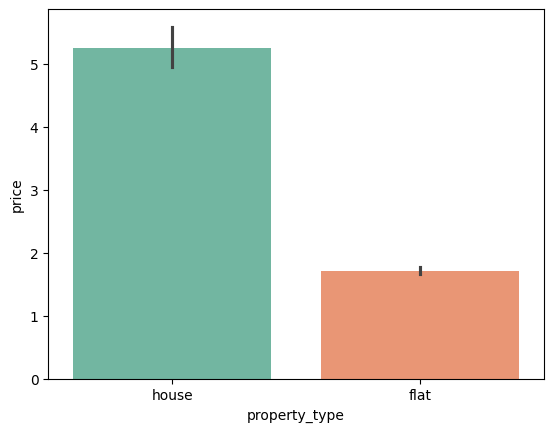

In [60]:
sns.barplot(x=df['property_type'], y=df['price'],palette='Set2')

<Axes: xlabel='property_type', ylabel='price'>

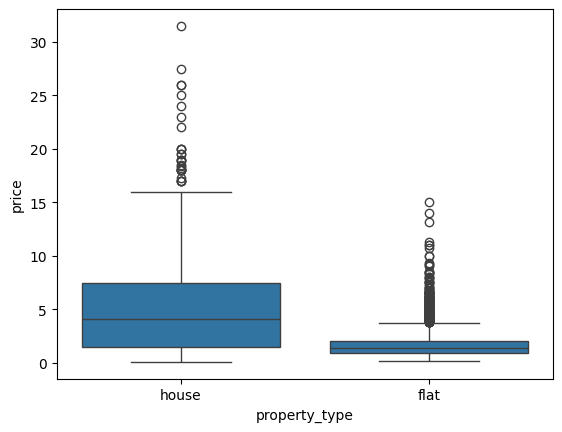

In [8]:
sns.boxplot(x=df['property_type'], y=df['price'])

# property_type VS area

<ipython-input-61-2888098938>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['property_type'], y=df['built_up_area'],palette='Set2', estimator=np.median)


<Axes: xlabel='property_type', ylabel='built_up_area'>

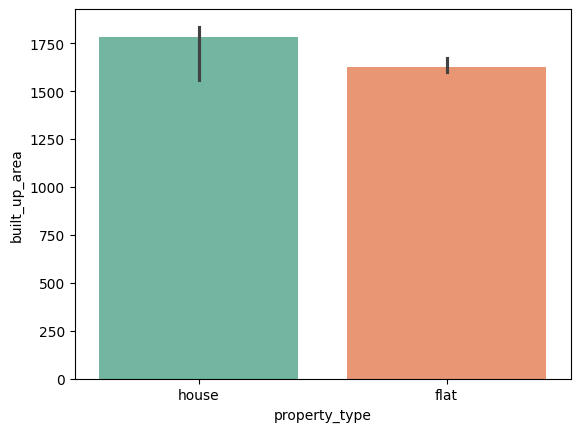

In [61]:
sns.barplot(x=df['property_type'], y=df['built_up_area'],palette='Set2', estimator=np.median)

<Axes: xlabel='property_type', ylabel='built_up_area'>

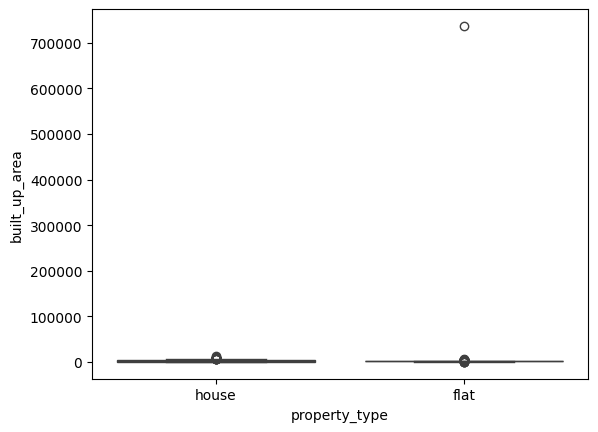

In [10]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

In [16]:
df[df['built_up_area'] > 700000]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1263,flat,hcbs sports ville,sohna road,0.35,4.0,875000.0,Built Up area: 737147 (68483.2 sq.m.),2,2,2,8.0,NaN,Relatively New,NaN,737147.0,NaN,0,0,0,0,0,2,44


### removing that crazy outlier

In [17]:
df = df[df['built_up_area'] != 737147]

<Axes: xlabel='property_type', ylabel='built_up_area'>

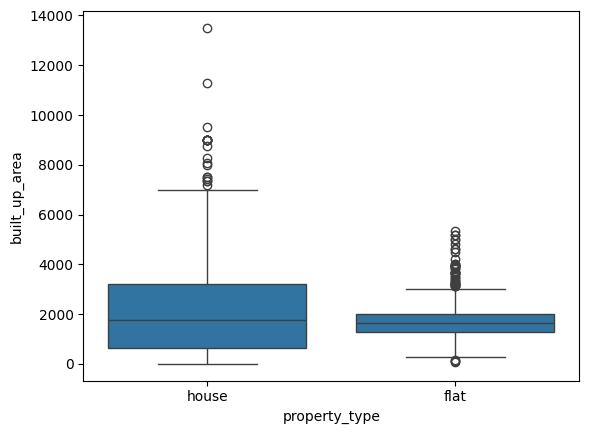

In [18]:
sns.boxplot(x=df['property_type'], y=df['built_up_area'])

# property_type vs price_per_sqft

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

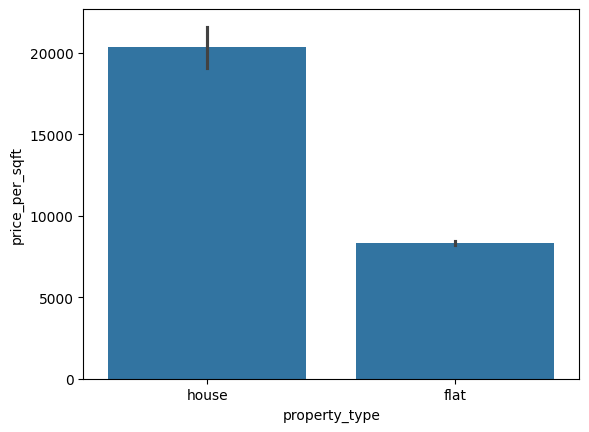

In [19]:
sns.barplot(x=df['property_type'], y=df['price_per_sqft'], estimator=np.median)

<Axes: xlabel='property_type', ylabel='price_per_sqft'>

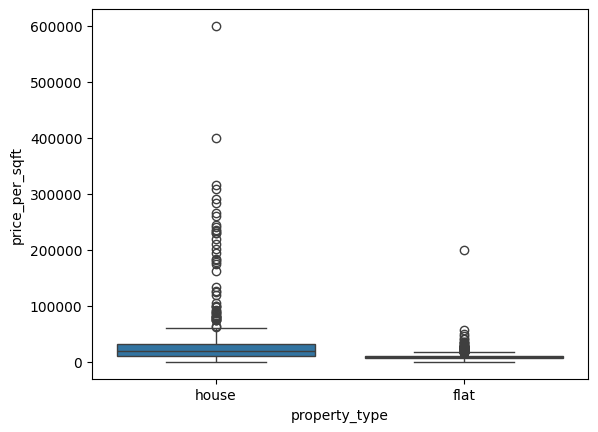

In [21]:
sns.boxplot(x=df['property_type'], y=df['price_per_sqft'])

### check outliers

In [23]:
df[df['price_per_sqft'] > 150000][['property_type','society','sector','price','price_per_sqft','area','areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,super_built_up_area,built_up_area,carpet_area
23,house,ardee city,sector 52,5.50,183333.0,300.0,Plot area 300(27.87 sq.m.),NaN,300.0,NaN
90,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),NaN,250.0,NaN
400,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 s...,NaN,160.0,150.0
490,house,unitech uniworld resorts,sector 33,9.50,173992.0,546.0,Plot area 546(50.73 sq.m.),NaN,546.0,NaN
632,house,independent,sector 54,3.75,234375.0,160.0,Plot area 160(14.86 sq.m.),NaN,160.0,NaN
769,flat,ambience caitriona,sector 24,14.00,200000.0,700.0,Built Up area: 700 (65.03 sq.m.),NaN,700.0,NaN
954,house,huda plot sector 38,sector 38,4.30,245398.0,175.0,Plot area 163(15.14 sq.m.)Built Up area: 145 s...,NaN,145.0,NaN
955,house,independent,sector 24,10.00,229885.0,435.0,Carpet area: 435 (40.41 sq.m.),NaN,NaN,435.0
980,house,independent,sector 12,6.00,315789.0,190.0,Plot area 190(17.65 sq.m.)Carpet area: 1600 sq...,NaN,NaN,1600.0
1048,house,independent,sector 17,3.50,218750.0,160.0,Built Up area: 160 (14.86 sq.m.),NaN,160.0,NaN


<Axes: xlabel='bedRoom', ylabel='property_type'>

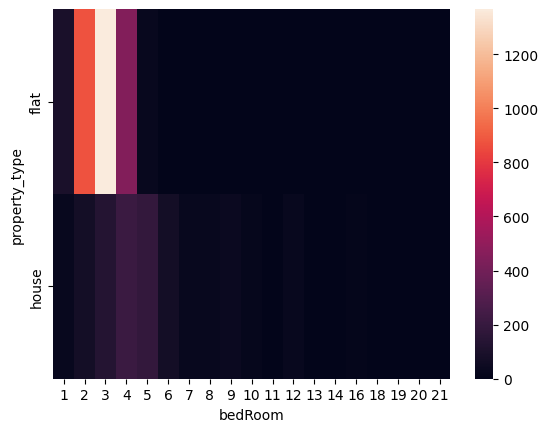

In [24]:
sns.heatmap(pd.crosstab(df['property_type'],df['bedRoom']))

In [25]:
# checking outliers
df[df['bedRoom'] >= 10]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
24,house,laxmi garden sector-11,sector 11,1.50,12820.0,1170.0,Plot area 130(108.7 sq.m.),12,9,1,3.0,East,Relatively New,NaN,1170.0,NaN,1,1,0,1,1,1,106
90,house,dlf city plots phase 2,sector 25,10.00,400000.0,250.0,Plot area 250(23.23 sq.m.),12,12,3+,4.0,North,Relatively New,NaN,250.0,NaN,1,1,0,0,0,1,114
97,house,independent house sector 45,sector 40,9.00,38022.0,2367.0,Plot area 2367(219.9 sq.m.)Built Up area: 9000...,12,12,3,4.0,North-West,New Property,NaN,9000.0,6000.0,0,1,0,0,0,1,71
100,house,independent,sector 56,11.95,43534.0,2745.0,Plot area 305(255.02 sq.m.),12,12,3+,4.0,West,Relatively New,NaN,2745.0,NaN,0,1,0,0,0,1,21
104,house,independent,sector 14,8.00,17707.0,4518.0,Plot area 502(419.74 sq.m.),12,4,3+,3.0,North,Old Property,NaN,4518.0,NaN,0,1,1,0,0,0,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3570,house,uppal southend,sector 49,6.75,31915.0,2115.0,Plot area 235(196.49 sq.m.),12,12,3+,3.0,West,Moderately Old,NaN,2115.0,NaN,0,0,0,0,1,0,49
3672,house,independent,sector 56,8.00,9654.0,8287.0,Plot area 362(33.63 sq.m.)Built Up area: 8286 ...,10,10,3+,4.0,NaN,Relatively New,NaN,8286.0,NaN,1,1,0,1,0,2,107
3773,house,independent,sector 11,3.50,15555.0,2250.0,Built Up area: 2250 (209.03 sq.m.),10,1,0,1.0,NaN,New Property,NaN,2250.0,NaN,0,0,0,0,0,0,0
3795,house,shivpuri,sector 7,2.80,12444.0,2250.0,Plot area 2250(209.03 sq.m.),10,7,3,1.0,NaN,Old Property,NaN,2250.0,NaN,1,1,0,1,1,1,0


<Axes: xlabel='property_type', ylabel='floorNum'>

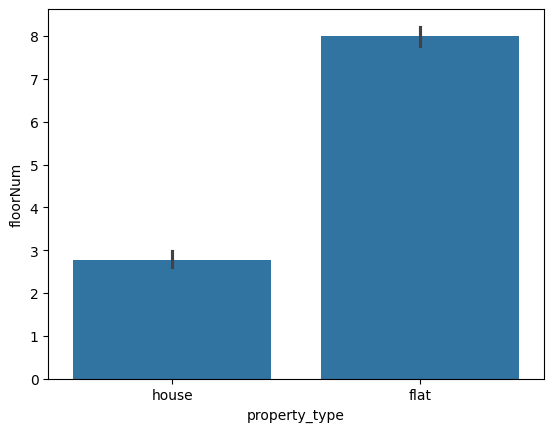

In [26]:
sns.barplot(x=df['property_type'],y=df['floorNum'])

<Axes: xlabel='property_type', ylabel='floorNum'>

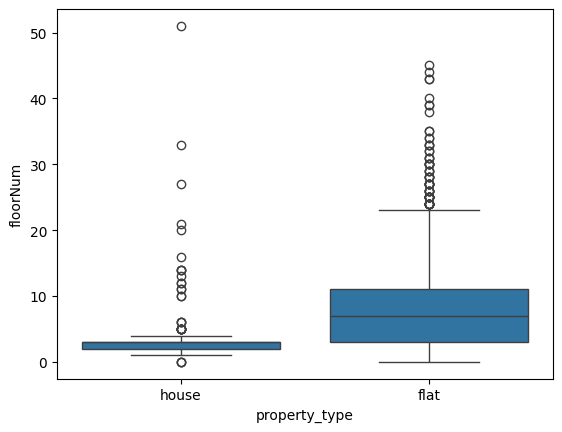

In [27]:
sns.boxplot(x=df['property_type'],y=df['floorNum'])

In [28]:
# checking for outliers
df[(df['property_type'] == 'house') & (df['floorNum'] > 10)]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
203,house,ninex city,sector 76,1.75,6250.0,2800.0,Carpet area: 2800 (260.13 sq.m.),4,4,0,14.0,NaN,Undefined,NaN,NaN,2800.0,0,0,0,0,0,0,0
349,house,dlf the arbour,sector 63,8.50,21519.0,3950.0,Built Up area: 3950 (366.97 sq.m.),4,4,3+,27.0,NaN,Undefined,NaN,3950.0,NaN,0,0,0,0,0,0,61
533,house,ats tourmaline,sector 109,1.87,8697.0,2150.0,Built Up area: 2150 (199.74 sq.m.),3,4,0,12.0,NaN,Undefined,NaN,2150.0,NaN,0,0,0,0,0,0,0
1303,house,spaze privy,sector 72,3.09,6981.0,4426.0,Built Up area: 3653 (339.37 sq.m.)Carpet area:...,5,5,3+,14.0,East,Relatively New,NaN,3653.0,2922.0,0,1,0,0,0,1,33
1457,house,satya the hermitage,sector 103,3.15,6702.0,4700.0,Built Up area: 4700 (436.64 sq.m.),4,5,0,12.0,East,Undefined,NaN,4700.0,NaN,0,0,0,0,0,0,61
1679,house,indiabulls centrum park,sector 103,3.25,8125.0,4000.0,Plot area 4000(371.61 sq.m.),4,3,3+,20.0,NaN,Under Construction,NaN,4000.0,NaN,0,0,0,0,0,0,51
1684,house,suncity township,sector 54,2.00,30968.0,646.0,Plot area 60Built Up area: 60 sq.m.Carpet area...,9,9,3,11.0,North,Relatively New,NaN,60.0,59.0,0,1,0,0,0,2,7
1976,house,spaze privy,sector 72,3.10,8486.0,3653.0,Plot area 3653(339.37 sq.m.),5,5,3+,21.0,NaN,Relatively New,NaN,3653.0,NaN,0,0,0,0,0,0,0
2420,house,vatika the seven lamps,sector 82,1.60,6597.0,2425.0,Plot area 2425(225.29 sq.m.),4,4,3+,16.0,North,Moderately Old,NaN,2425.0,NaN,0,1,0,0,0,0,94
2454,house,independent,sector 92,1.80,7627.0,2360.0,Built Up area: 2360 (219.25 sq.m.),4,5,0,13.0,NaN,Undefined,NaN,2360.0,NaN,0,0,0,0,0,0,0


### conclusion houses(villa) but in appartments

In [29]:

df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,2.0,NaN,Undefined,NaN,1000.0,NaN,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,0.0,NaN,Relatively New,NaN,NaN,4800.0,1,1,0,0,0,0,119


<Axes: xlabel='agePossession', ylabel='property_type'>

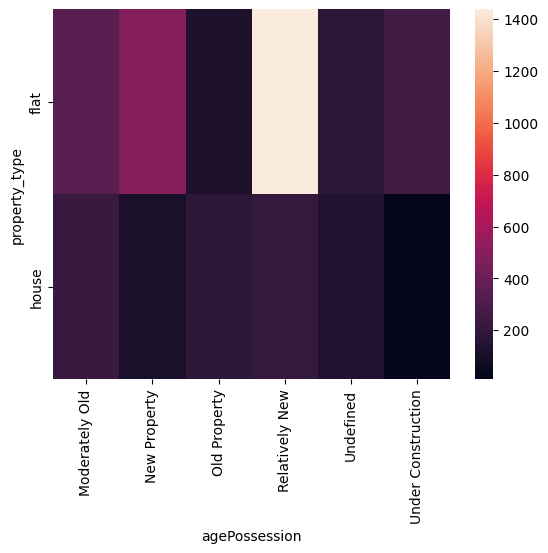

In [30]:
sns.heatmap(pd.crosstab(df['property_type'], df['agePossession']))

<Axes: xlabel='agePossession', ylabel='property_type'>

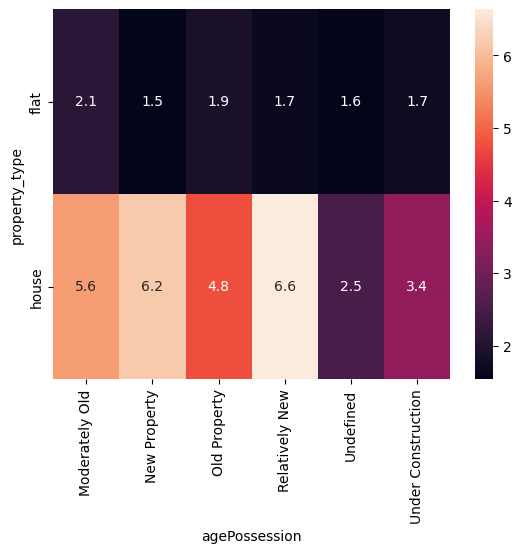

In [31]:
sns.heatmap(pd.pivot_table(df,index='property_type', columns='agePossession', values='price',aggfunc='mean'),annot=True)

<Axes: xlabel='bedRoom', ylabel='property_type'>

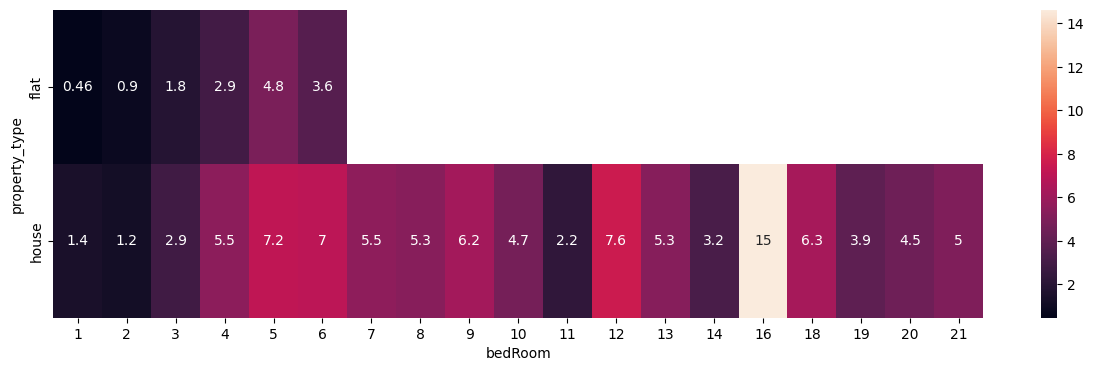

In [32]:
plt.figure(figsize=(15,4))
sns.heatmap(pd.pivot_table(df,index='property_type',columns='bedRoom',values='price',aggfunc='mean'),annot=True)


<Axes: xlabel='furnishing_type', ylabel='property_type'>

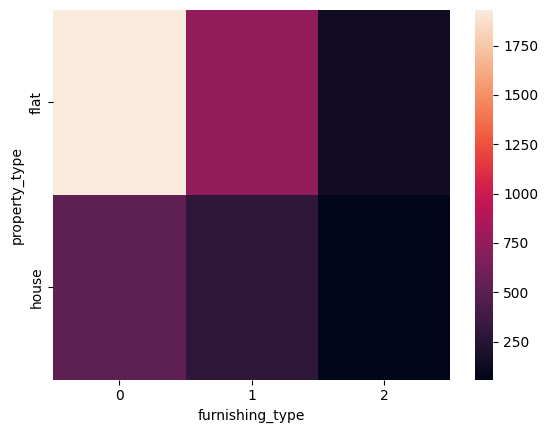

In [33]:
sns.heatmap(pd.crosstab(df['property_type'],df['furnishing_type']))


<Axes: xlabel='furnishing_type', ylabel='property_type'>

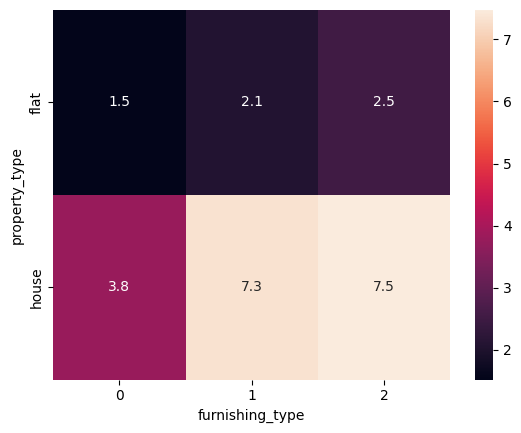

In [40]:
sns.heatmap(pd.pivot_table(df,index='property_type',columns='furnishing_type',values='price',aggfunc='mean'),annot=True)


<ipython-input-59-2730140448>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['property_type'],y=df['luxury_score'],palette='Set2')


<Axes: xlabel='property_type', ylabel='luxury_score'>

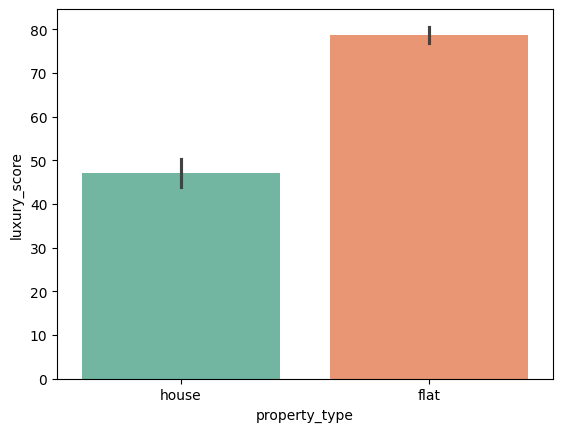

In [59]:
sns.barplot(x=df['property_type'],y=df['luxury_score'],palette='Set2')


<ipython-input-58-4083656591>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['property_type'],y=df['luxury_score'],palette='Set2')


<Axes: xlabel='property_type', ylabel='luxury_score'>

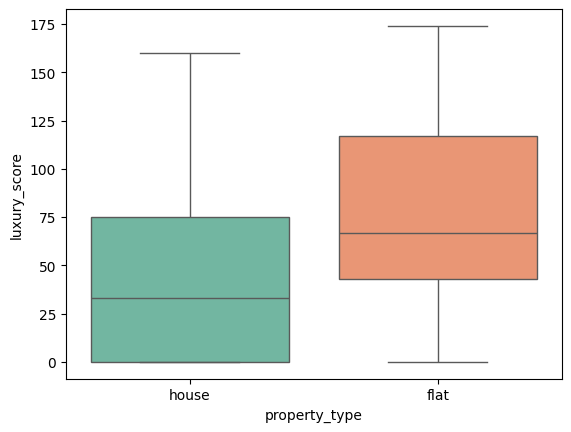

In [58]:
sns.boxplot(x=df['property_type'],y=df['luxury_score'],palette='Set2')


In [37]:

df.head(2)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,2.0,NaN,Undefined,NaN,1000.0,NaN,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,0.0,NaN,Relatively New,NaN,NaN,4800.0,1,1,0,0,0,0,119


# sector analysis

<Axes: xlabel='sector', ylabel='property_type'>

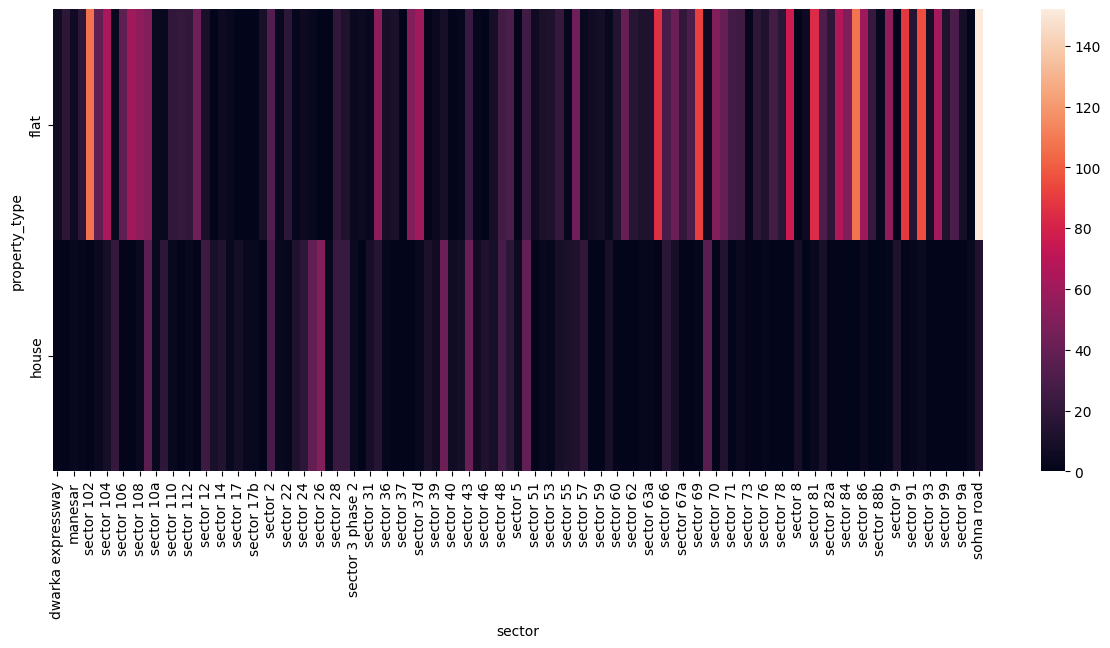

In [42]:
plt.figure(figsize=(15,6))
sns.heatmap(pd.crosstab(df['property_type'],df['sector'].sort_index()))

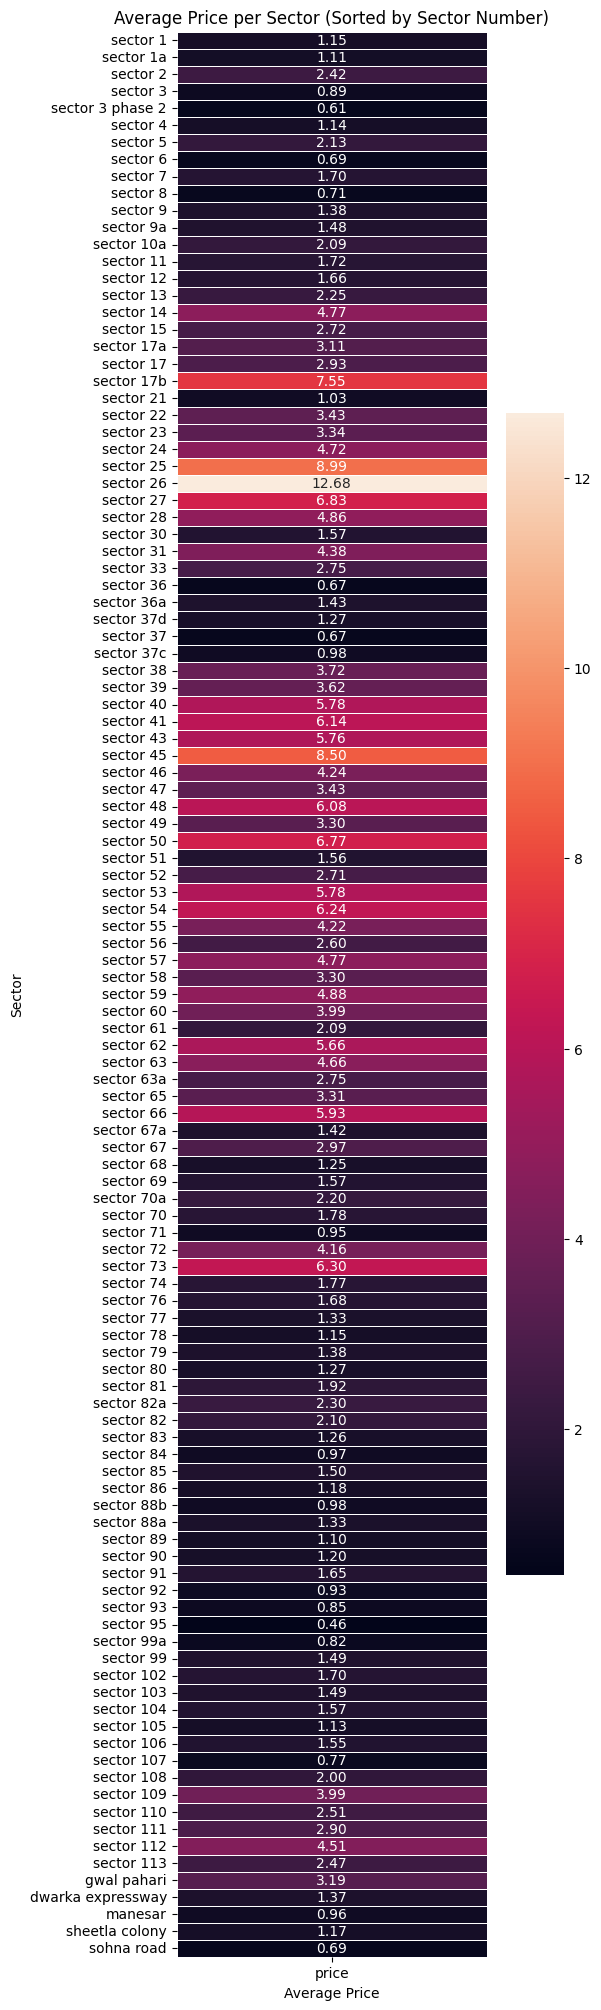

In [43]:

# sector analysis
import re
# Group by 'sector' and calculate the average price
avg_price_per_sector = df.groupby('sector')['price'].mean().reset_index()

# Function to extract sector numbers
def extract_sector_number(sector_name):
    match = re.search(r'\d+', sector_name)
    if match:
        return int(match.group())
    else:
        return float('inf')  # Return a large number for non-numbered sectors

avg_price_per_sector['sector_number'] = avg_price_per_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sector_sorted_by_sector = avg_price_per_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sector_sorted_by_sector.set_index('sector')[['price']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Average Price per Sector (Sorted by Sector Number)')
plt.xlabel('Average Price')
plt.ylabel('Sector')
plt.show()

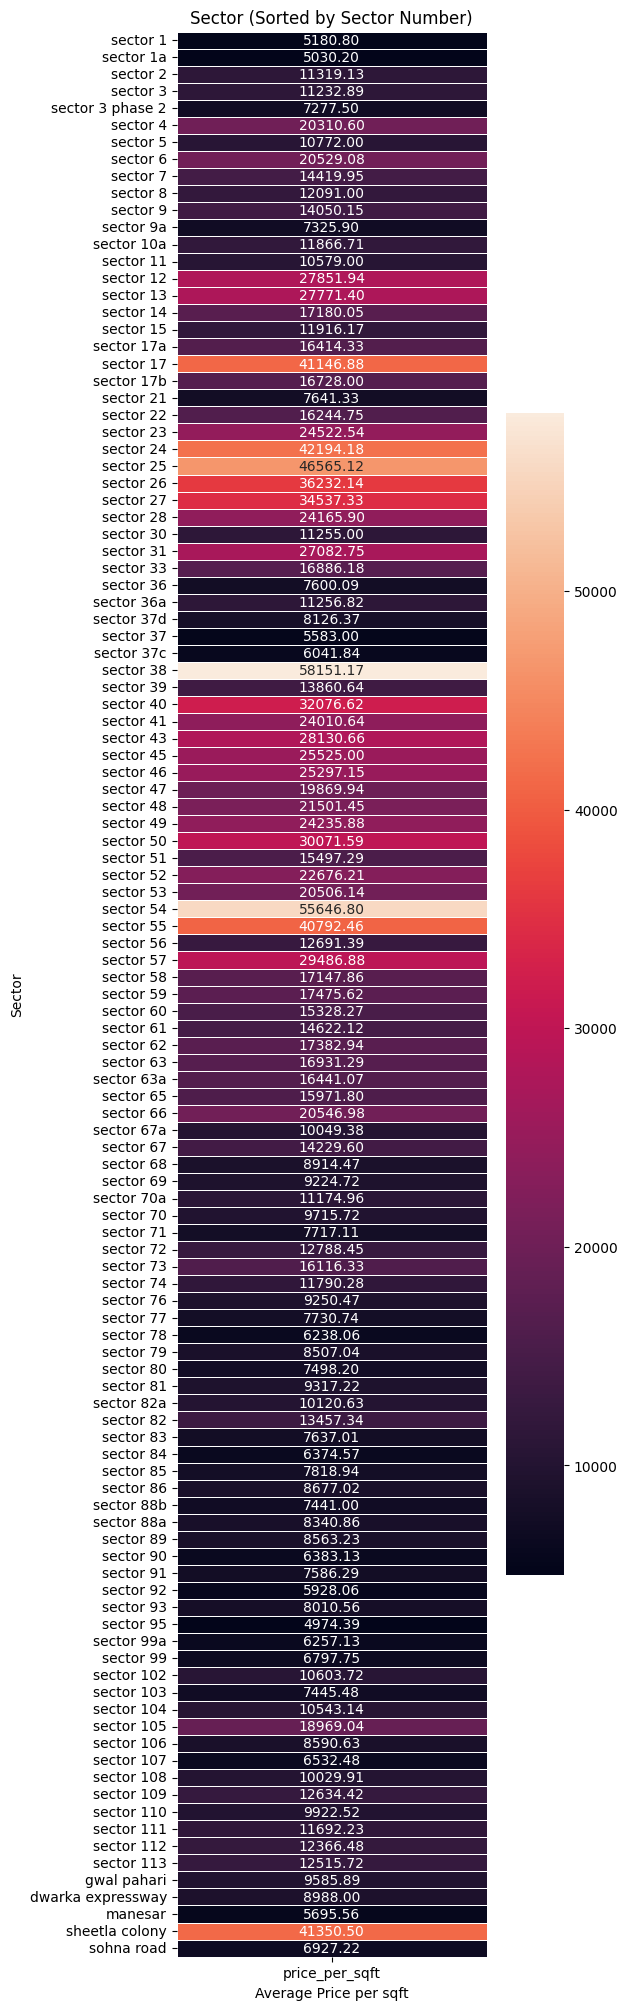

In [44]:
avg_price_per_sqft_sector = df.groupby('sector')['price_per_sqft'].mean().reset_index()

avg_price_per_sqft_sector['sector_number'] = avg_price_per_sqft_sector['sector'].apply(extract_sector_number)

# Sort by sector number
avg_price_per_sqft_sector_sorted_by_sector = avg_price_per_sqft_sector.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(avg_price_per_sqft_sector_sorted_by_sector.set_index('sector')[['price_per_sqft']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

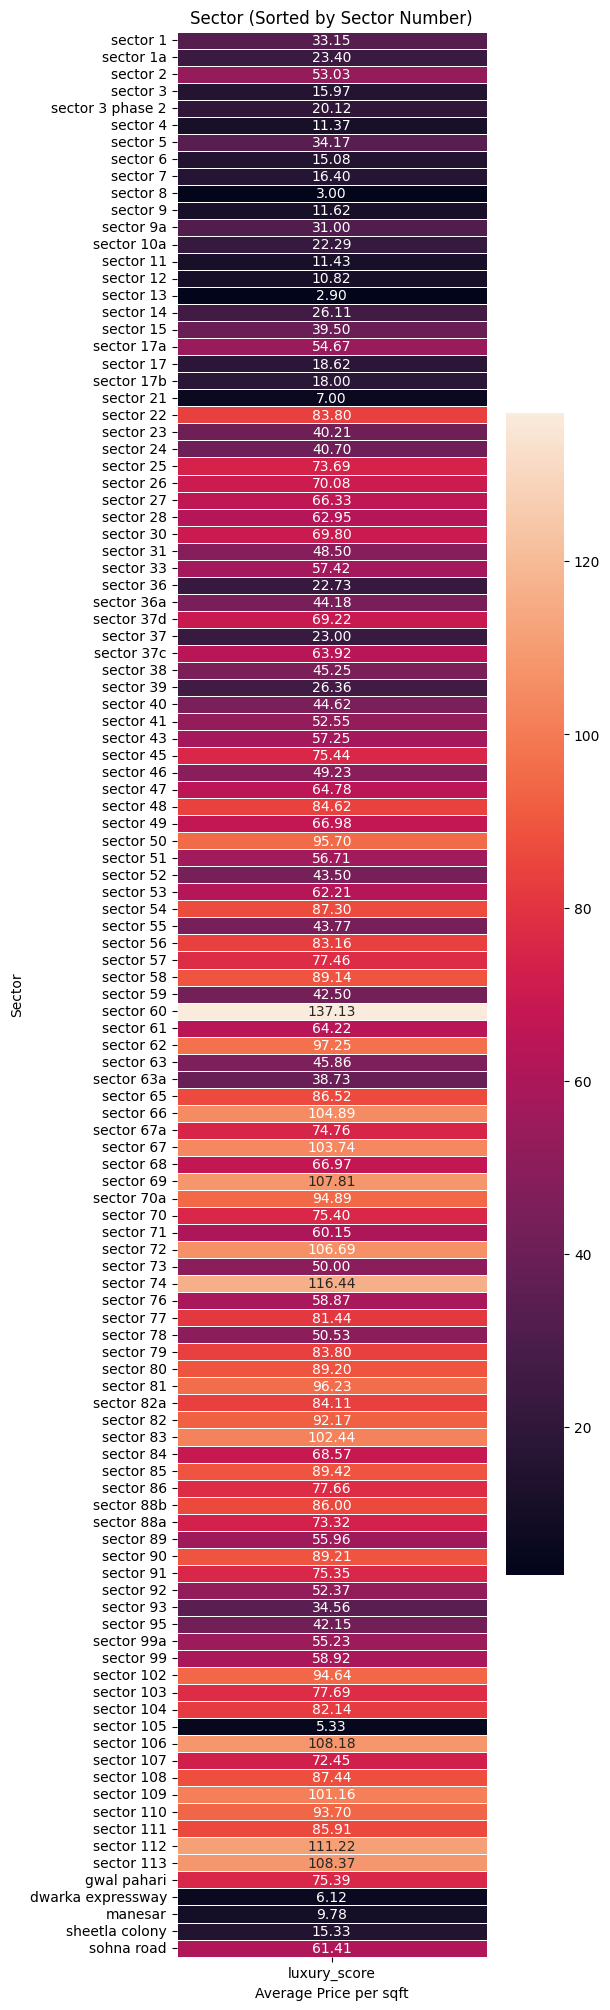

In [45]:

luxury_score = df.groupby('sector')['luxury_score'].mean().reset_index()

luxury_score['sector_number'] = luxury_score['sector'].apply(extract_sector_number)

# Sort by sector number
luxury_score_sector = luxury_score.sort_values(by='sector_number')

# Plot the heatmap
plt.figure(figsize=(5, 25))
sns.heatmap(luxury_score_sector.set_index('sector')[['luxury_score']], annot=True, fmt=".2f", linewidths=.5)
plt.title('Sector (Sorted by Sector Number)')
plt.xlabel('Average Price per sqft')
plt.ylabel('Sector')
plt.show()

In [46]:

df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,house,independent,sector 105,0.74,7400.0,1000.0,Built Up area: 1000 (92.9 sq.m.),3,3,0,2.0,NaN,Undefined,NaN,1000.0,NaN,0,0,0,0,0,0,0
1,flat,tulip ivory,sector 70,5.00,10416.0,4800.0,Carpet area: 4800 (445.93 sq.m.),6,7,3+,0.0,NaN,Relatively New,NaN,NaN,4800.0,1,1,0,0,0,0,119
2,flat,signature global park,sohna road,0.90,8035.0,1120.0,Super Built up area 1120(104.05 sq.m.),3,2,2,2.0,South,Under Construction,1120.0,NaN,NaN,0,0,0,0,0,0,144
3,house,independent,sector 47,5.15,26615.0,1935.0,Plot area 215(179.77 sq.m.),9,9,3+,3.0,East,Relatively New,NaN,1935.0,NaN,0,0,1,0,0,1,75
4,flat,central park flower valley aqua front towers,sector 33,1.70,9502.0,1789.0,Super Built up area 1789(166.2 sq.m.),3,3,3,12.0,NaN,Under Construction,1789.0,NaN,NaN,0,0,0,0,0,0,24


# Price

<Axes: xlabel='area', ylabel='price'>

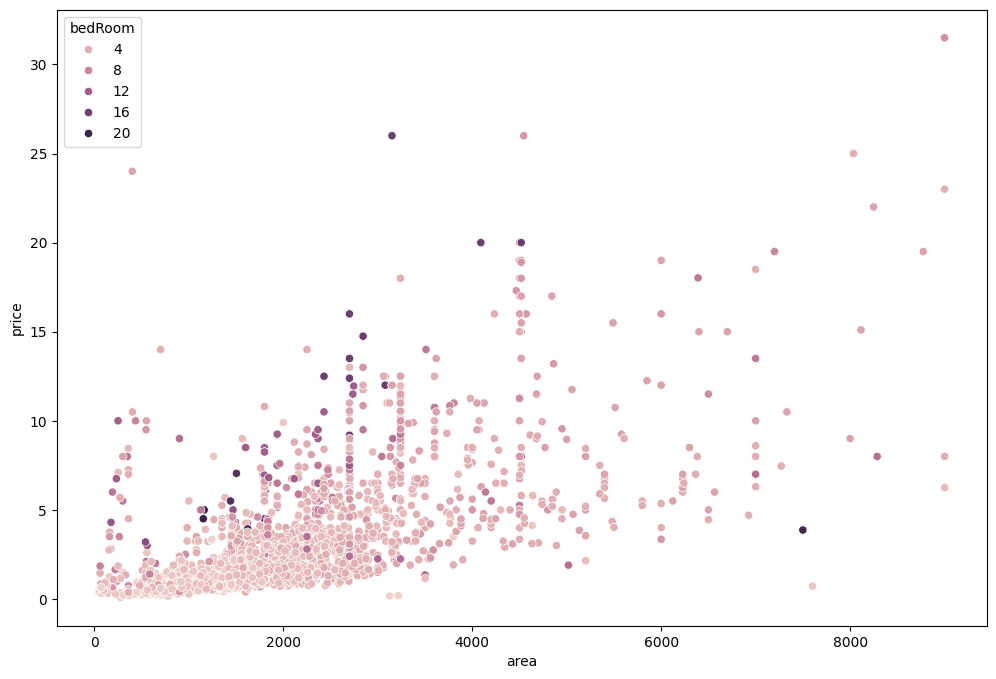

In [50]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'], y=df['price'],hue=df['bedRoom'])

<Axes: xlabel='area', ylabel='price'>

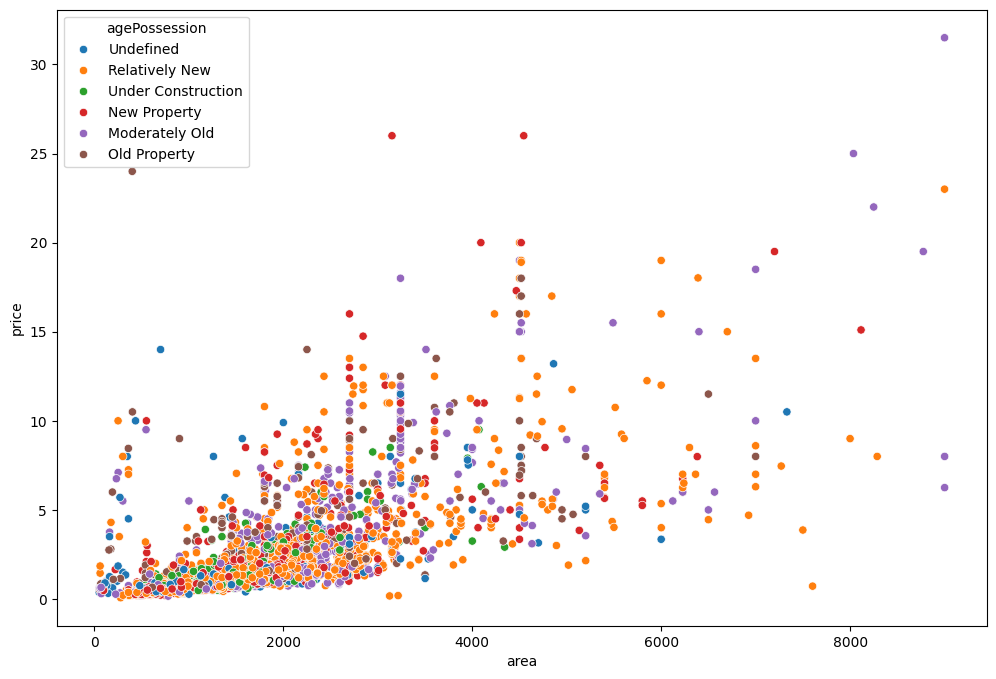

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['agePossession'])

<Axes: xlabel='area', ylabel='price'>

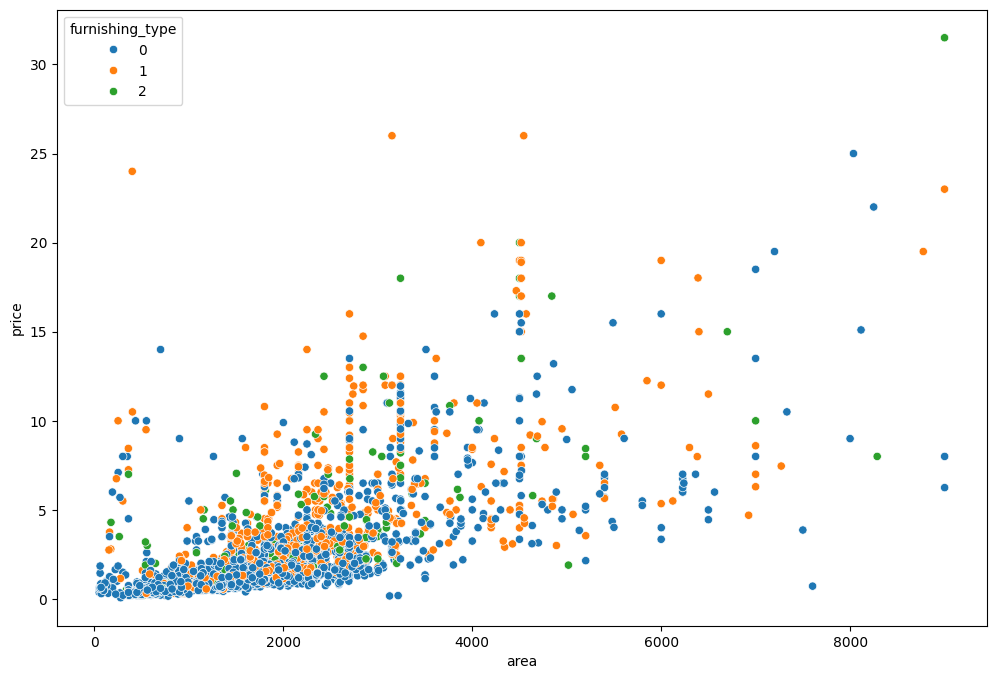

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df[df['area']<10000]['area'],y=df['price'],hue=df['furnishing_type'].astype('category'))


<ipython-input-57-3126018262>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median, palette='Set2')


<Axes: xlabel='bedRoom', ylabel='price'>

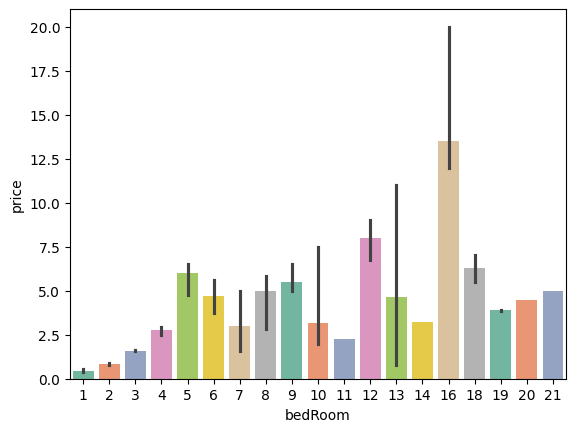

In [57]:
sns.barplot(x=df['bedRoom'],y=df['price'],estimator=np.median, palette='Set2')


<ipython-input-63-180329754>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median,palette='Set2')


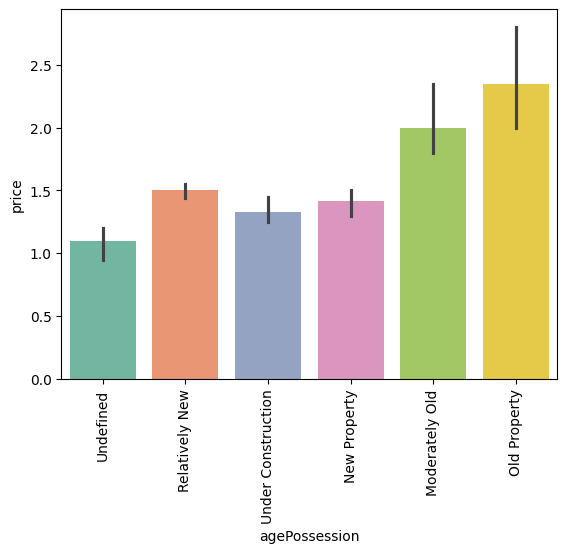

In [63]:
sns.barplot(x=df['agePossession'],y=df['price'],estimator=np.median,palette='Set2')
plt.xticks(rotation='vertical')
plt.show()

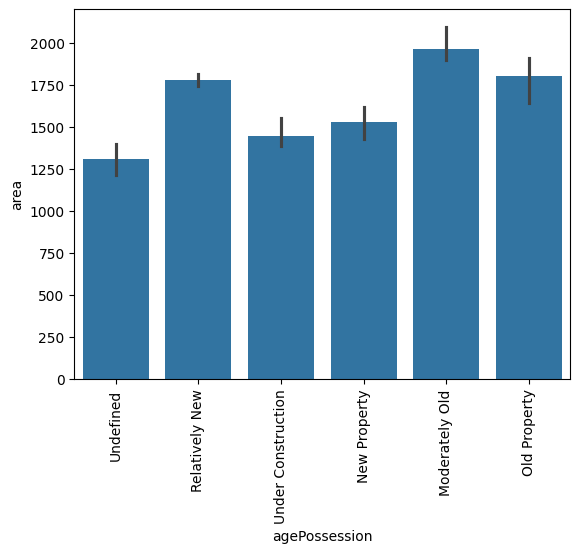

In [64]:

sns.barplot(x=df['agePossession'],y=df['area'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='furnishing_type', ylabel='price'>

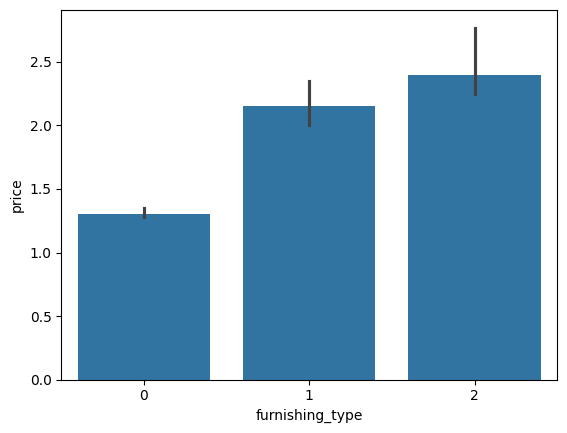

In [65]:

sns.barplot(x=df['furnishing_type'],y=df['price'],estimator=np.median)

<Axes: xlabel='luxury_score', ylabel='price'>

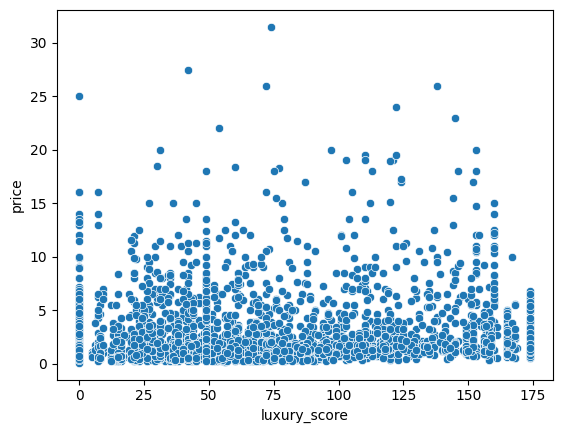

In [67]:
sns.scatterplot(x=df['luxury_score'],y=df['price'])

# correlation

In [72]:
corr = df.select_dtypes(include='number').corr()
corr

,price,price_per_sqft,area,bedRoom,bathroom,floorNum,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
price,1.000000,0.390690,0.034760,0.521507,0.588605,-0.093932,0.769412,0.552096,-0.011360,0.258748,0.401098,0.309204,0.341615,-0.003380,0.250054,0.095123
price_per_sqft,0.390690,1.000000,-0.027344,0.315459,0.296197,-0.113108,0.282419,-0.079951,-0.036328,0.095496,0.102526,0.086844,0.121853,0.010359,0.104122,-0.045139
area,0.034760,-0.027344,1.000000,0.016690,0.018655,-0.022676,0.968765,0.174697,0.992773,0.028671,0.010939,0.007045,0.010068,0.034251,-0.006950,-0.002900
bedRoom,0.521507,0.315459,0.016690,1.000000,0.908360,-0.131878,0.734787,0.222945,-0.019144,0.135935,0.276206,0.180098,0.270386,0.072414,0.228023,-0.022659
bathroom,0.588605,0.296197,0.018655,0.908360,1.000000,-0.069106,0.740212,0.299539,-0.016262,0.160891,0.409297,0.195494,0.285024,0.065413,0.275627,0.094144
floorNum,-0.093932,-0.113108,-0.022676,-0.131878,-0.069106,1.000000,0.154027,-0.001502,-0.028229,-0.054540,0.100193,-0.089129,-0.060389,-0.009881,0.023263,0.181057
super_built_up_area,0.769412,0.282419,0.968765,0.734787,0.740212,0.154027,1.000000,0.954333,0.924138,0.035265,0.553620,0.051275,0.144020,-0.003753,0.130512,0.206117
built_up_area,0.552096,-0.079951,0.174697,0.222945,0.299539,-0.001502,0.954333,1.000000,0.972043,0.194258,0.343397,0.209678,0.238080,-0.016250,0.151725,0.192700
carpet_area,-0.011360,-0.036328,0.992773,-0.019144,-0.016262,-0.028229,0.924138,0.972043,1.000000,0.024663,-0.018170,-0.009909,-0.013331,0.031941,-0.027632,-0.012947
study room,0.258748,0.095496,0.028671,0.135935,0.160891,-0.054540,0.035265,0.194258,0.024663,1.000000,0.186870,0.227941,0.314801,0.036523,0.139265,0.148994


<Axes: >

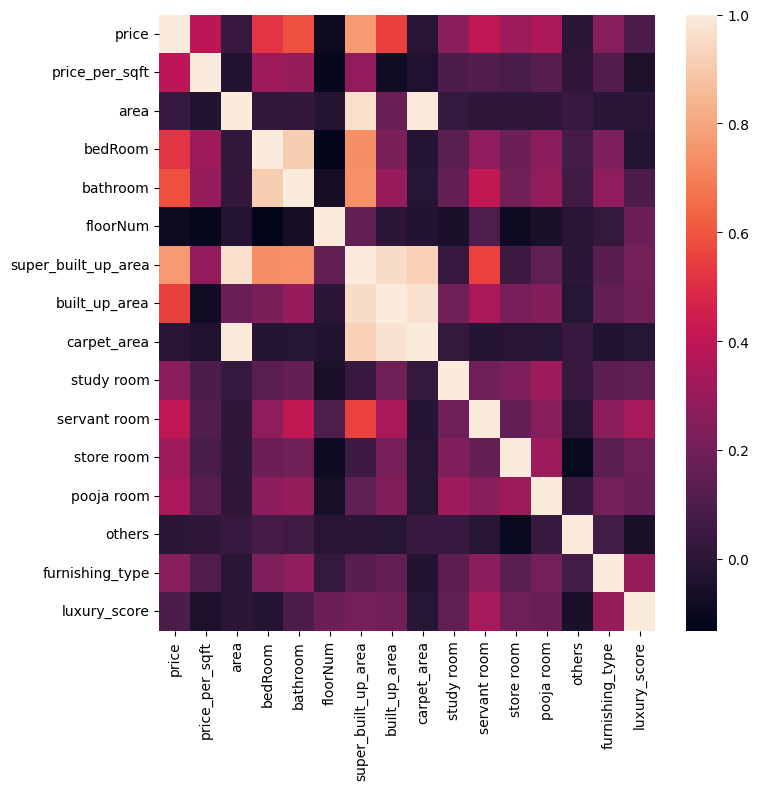

In [73]:

plt.figure(figsize=(8,8))
sns.heatmap(corr)